In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_labels = []
train_samples = []


In [3]:
test_labels = []
test_samples = []


In [4]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)  
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)  
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [6]:
#print (train_samples)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [8]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/Users/wajdiahmed/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [12]:
print (scaled_train_samples)

[[0.3908046 ]
 [0.95402299]
 [0.03448276]
 ...
 [0.81609195]
 [0.35632184]
 [0.64367816]]


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20,shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6612 - acc: 0.5360 - val_loss: 0.6457 - val_acc: 0.5810
Epoch 2/20
 - 0s - loss: 0.6418 - acc: 0.6212 - val_loss: 0.6179 - val_acc: 0.7048
Epoch 3/20
 - 0s - loss: 0.6146 - acc: 0.7042 - val_loss: 0.5834 - val_acc: 0.7905
Epoch 4/20
 - 0s - loss: 0.5842 - acc: 0.7608 - val_loss: 0.5483 - val_acc: 0.8429
Epoch 5/20
 - 0s - loss: 0.5552 - acc: 0.7889 - val_loss: 0.5141 - val_acc: 0.8571
Epoch 6/20
 - 0s - loss: 0.5257 - acc: 0.8185 - val_loss: 0.4780 - val_acc: 0.8619
Epoch 7/20
 - 0s - loss: 0.4967 - acc: 0.8386 - val_loss: 0.4433 - val_acc: 0.8667
Epoch 8/20
 - 0s - loss: 0.4688 - acc: 0.8429 - val_loss: 0.4106 - val_acc: 0.8905
Epoch 9/20
 - 0s - loss: 0.4429 - acc: 0.8683 - val_loss: 0.3796 - val_acc: 0.9143
Epoch 10/20
 - 0s - loss: 0.4194 - acc: 0.8741 - val_loss: 0.3525 - val_acc: 0.9238
Epoch 11/20
 - 0s - loss: 0.3994 - acc: 0.8931 - val_loss: 0.3267 - val_acc: 0.9238
Epoch 12/20
 - 0s - loss: 0.3819 - acc

In [16]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [17]:
for i in predictions:
    print(i)

[0.9377585  0.06224145]
[0.3465997 0.6534003]
[0.4842015  0.51579845]
[0.30485433 0.69514567]
[0.93718666 0.06281331]
[0.05657633 0.9434236 ]
[0.8113689  0.18863119]
[0.06224058 0.93775946]
[0.9160119  0.08398814]
[0.19859622 0.80140376]
[0.910674   0.08932603]
[0.08005757 0.9199424 ]
[0.46049514 0.5395048 ]
[0.13345367 0.86654633]
[0.9160118  0.08398816]
[0.05934518 0.9406548 ]
[0.8628854 0.1371146]
[0.18388791 0.8161121 ]
[0.89217407 0.10782589]
[0.10375665 0.89624333]
[0.9357355  0.06426443]
[0.04446705 0.955533  ]
[0.899032   0.10096797]
[0.11294266 0.88705736]
[0.66771245 0.3322875 ]
[0.0513993 0.9486007]
[0.78051335 0.21948658]
[0.4137178 0.5862822]
[0.507979 0.492021]
[0.08734985 0.9126501 ]
[0.50797904 0.49202102]
[0.04667257 0.9533274 ]
[0.9363197  0.06368027]
[0.21417226 0.7858278 ]
[0.90502894 0.09497113]
[0.39084753 0.60915244]
[0.9367352  0.06326482]
[0.08734985 0.9126501 ]
[0.6884732  0.31152675]
[0.08734985 0.9126501 ]
[0.9380241  0.06197593]
[0.4137178 0.5862822]
[0.916

In [18]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1


    Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[193  17]
 [  8 202]]


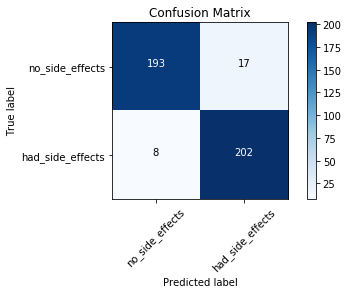

In [28]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Save and Load Model
1.model.save()

In [29]:
model.save('medical_trial_model.h5')

In [30]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [31]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
new_model.get_weights()

[array([[ 0.07526853,  0.03928678, -0.5514625 ,  0.22573735,  0.7354636 ,
         -0.17964181,  0.50035703, -0.13714534,  0.20287299,  0.1618722 ,
          0.719581  , -0.29267392, -0.08866704,  0.07867569, -0.10118589,
         -0.03420593]], dtype=float32),
 array([ 0.19146249,  0.14851157,  0.        , -0.07266238, -0.10187677,
         0.        , -0.10469225,  0.        , -0.0635323 ,  0.16600561,
        -0.13509713,  0.        ,  0.        ,  0.16362204,  0.        ,
         0.1412653 ], dtype=float32),
 array([[ 0.2284339 , -0.21482325, -0.06079462,  0.08423436,  0.12048661,
          0.3280367 ,  0.30241993, -0.1297275 , -0.14675304,  0.31444433,
         -0.08623318,  0.07010745, -0.21795627,  0.01150492,  0.1498774 ,
          0.2032891 ,  0.12940519,  0.19393463,  0.25727606,  0.18499902,
         -0.07636133, -0.14053065, -0.10621972,  0.11111165, -0.32633984,
          0.22201586,  0.24922203,  0.12174767, -0.08106574,  0.34241077,
          0.28544563,  0.29375628],
 

In [33]:
new_model.optimizer